<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite Differences - Seismometer Equation</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Ashim Rijal ([@ashimrijal](https://github.com/ashimrijal))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))


This exercise covers the following aspects:

* Solving seismometer equation with finite difference method
* Getting familiar with seismometer response function
---

## Basic Equations

** Please refer to the Exercise 4.19 from the book.**

The seismometer equation is given by
$$
\ddot{x} + 2\epsilon \dot{x} + \omega^2_0 x = - \ddot{u}
$$

Where,

$ \epsilon $ is the damping parameter,

$ \omega_0 $ is the eigenfrequency,

$ \ddot{u}(t) $ is the ground motion by which the seismometer is excited, and

$ x(t) $ is the motion of the seismometer mass.

We replace the time derivative by centered finite-differentiation
$$
\dot{x} \ \approx \ \frac{x (t + \mathrm{d}t) - x ( t- \mathrm{d}t)} {2\mathrm{d}t}
$$

$$
\ddot{x} \ \approx \ \frac{x( t+ \mathrm{d}t)-2x(t) + x( t- \mathrm{d}t)} {\mathrm{d}t^2}
$$

Now, solving for $ x(t+\mathrm{d}t) $ the extrapolation scheme is

$$
x(t+\mathrm{d}t) = \frac{ - \ddot{u}(t) \mathrm{d}t^2 + (2-\omega^2_0 \mathrm{d}t^2) x(t) + (\epsilon \mathrm{d}t-1) x(t-\mathrm{d}t)} {(1+\epsilon \mathrm{d}t)}
$$


### Exercise

** Part 1**

While running the following cells frequency of forcing (the frequency of ground motion) and the damping parameter will be asked to enter. First try using undamped seismometer (i.e. h = 0) for some forcing frequency (eg. 0.1 Hz, 1 Hz, 2Hz, 3Hz, 4Hz, 5Hz, etc.) and interpret the results. 

** Part 2**

Now try frequency of forcing of your choice (eg. 1 HZ) and try to search for suitable damping parameter (h).

**Message: Once you become familiar with all the codes below you can go to the Cell tab on the toolbar and click Run All.**

In [10]:
#Configuration step (Please run it before the simulation code!)

import numpy as np
import matplotlib
import matplotlib.pylab as plt
matplotlib.rcParams['figure.facecolor'] = 'w'                 # remove grey background

# Show the plots in the Notebook.
plt.switch_backend("nbagg")


In [11]:
#Initialization of parameters

f0 = 1.                                                       # eigenfrequency of seismometer (hertz)
w = 2. * np.pi * f0                                           # in radians per second
dt = .01                                                      # time increment for numerical scheme
isnap = 2                                                     # snapshot frequency for visualization

# Central frequency of forcing or ground motion (will be asked)
fu0 = float(input('Give frequency of forcing (e.g. f=1 Hz) : '))

# Damping parameter of seismometer (will be asked)
h = float(input('Give damping parameter (e.g. h=0.5) : '))

# Initialize ground motion

# Initialize parameters for ground motion
p = 1. / fu0                                                  # period
nts = int(2. * p / dt)                                        # time steps
uii = np.zeros(nts)                                           # ground motion
t0 = p / dt                                                   # time (S)
a = 4. / p                                                    # half-width (so called sigma)

# we use derivative of a Gaussian as our ground motion
for it in range(nts):
    t = (it - t0) * dt
    uii[it] = -2 * a * t * np.exp(-(a * t) ** 2)

nt = int(round(5. * 1. / fu0 / dt))                           # total number of time steps
src = np.zeros(nt)                                            # initialize an source array of zeros
src[0:len(uii)] = uii                                         # make derivative of gaussian as source

# End initialization of ground motion


# Initial conditions
eps = h * w                                                   # damping factor
x = np.zeros(nt)
xnow = 0
xold = 0
x_vector = np.zeros(nt)


Give frequency of forcing (e.g. f=1 Hz) : 1
Give damping parameter (e.g. h=0.5) : 0


/home/rijalashim/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


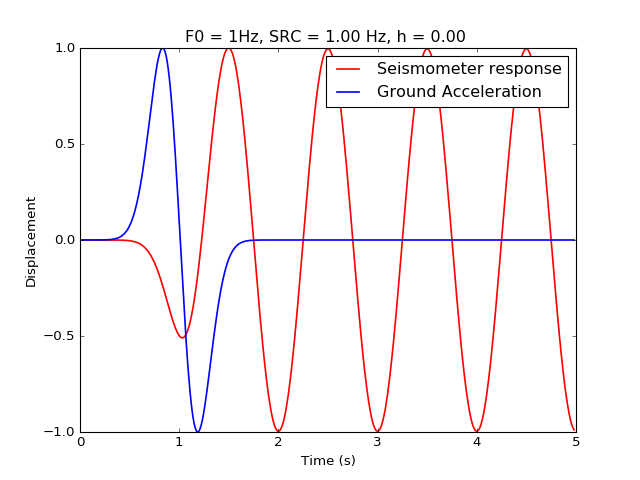

In [12]:
# Extrapolation scheme and the plots

# Initialization of plots

# lines1 will plot the seismometer response and lines2 for source function

lines1 = plt.plot(np.dot((np.arange(1, nt+1)), dt), x_vector[0:nt] /
                  np.max(np.abs(x[0:nt])), color = "red", lw = 1.5, label="Seismometer response")
lines2 = plt.plot(np.zeros(nt), color = 'blue',lw = 1.5,  label="Ground Acceleration")

plt.title("At rest")
plt.axis([0, nt*dt, -1, 1])
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.legend(loc="upper right")
plt.ion()
plt.show()

# Begin extrapolation and update the plot

# Extrapolation scheme (Centered finite-difference)

for i in range(nt):
    if i == 0:
        xold = xnow

    xnew = (-src[i] * dt ** 2 + (2 - w ** 2 * dt ** 2) * xnow + (eps * dt - 1) * xold) / (1 + eps * dt)
  
    xold = xnow                                               # for next loop present will be past    
    xnow = xnew                                               # for next step future will be present
    x[i] = xnow
    x_vector[i] = x[i]

# Updating the plots
    if not i % isnap:
        for l in lines1:
            l.remove()
            del l
        for k in lines2:
            k.remove()
            del k
        
        lines1  = plt.plot(np.dot((np.arange (1, i+1)), dt), x_vector[0:i] /
                          np.max(np.abs (x[0:nt])),color = "red",lw = 1.5, label="Seismometer response")
        lines2 = plt.plot(np.dot((np.arange (1, i+1)), dt), src[0:i] / 
                          np.max(src[0:nt]), color = 'blue',lw = 1.5, label="Ground Acceleration")
    plt.title("F0 = 1Hz, SRC = %.2f Hz, h = %.2f " % (fu0, h))
    plt.gcf().canvas.draw()      
        
plt.ioff()
plt.show()


## Solutions
**Part 1**

Let us try frequency of forcing 1 Hz and damping parameter h = 0. Then we see that response of seismometer doesn't come to rest even after the ground motion comes to rest. 

** Part 2**

For low damping (h< 1) there exists a peak in the response function, underdamped case. If h=1, the seismometer comes to rest in the least possible time without overshooting, a case called critically damped where the response curve has no peak. The most common values used in seismometres are close to critical (eg. 0.707) in which seismometers perform optimally. For values greater than 1 (h> 1) the sensitivity of seismometer decreases, a case of overdamping.